# Brain Weight Prediction

![](https://i.pinimg.com/originals/b3/38/44/b33844ba55283f453d8af901ec8ac3f6.jpg)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing libraries and dataset
5. Data preprocessing
6. Prediction Models
    - Spliting the dataset into 75:25 ratio
    - Deploying the models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Lasso Regression
        - Ridge Regression
        - MLP Regression
        - XgBoost Regression
        - Gradient Boosting Regression
        - Support Vector Regression
7. Comparing the accuracy of the models
8. Conclusion

### Abstract
Brain morphology varies across the ageing trajectory and the prediction of a person's age using brain features can aid the detection of abnormalities in the ageing process. Existing studies on such “brain weight prediction” vary widely in terms of their methods and type of data, so at present the most accurate and generalisable methodological approach is unclear. Therefore, we used the UK Biobank data set (N = 10,824, age range 47–73) to compare the performance of the machine learning models support vector regression, relevance vector regression and Gaussian process regression on whole-brain region-based or voxel-based structural magnetic resonance imaging data with or without dimensionality reduction through principal component analysis. Performance was assessed in the validation set through cross-validation as well as an independent test set. The models achieved mean absolute errors between 3.7 and 4.7 years, with those trained on voxel-level data with principal component analysis performing best. Overall, we observed little difference in performance between models trained on the same data type, indicating that the type of input data had greater impact on performance than model choice. All code is provided online in the hope that this will aid future research.

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/anubhabswain/brain-weight-in-humans

### Goal
The goal of this project is to make a prediction model which will predict the weight of the human brain depending on the head size.

### Importing Libraries and dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd 
import os

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Important insights about the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


### Obtaining the Correlation Matrix of the dataset 

In [4]:
dataset.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


We have decided to study the relationship between the Brain Weight and the Head Size

**Preparing the features and samples for training our Linear Regression Model**

In [5]:
x = dataset.iloc[:,2].values.reshape(-1,1)
x[:5]

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177]], dtype=int64)

In [6]:
y = dataset['Brain Weight(grams)']
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: Brain Weight(grams), dtype: int64

*********************
##   Prediction Model Creation
Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with nine regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


* **MLP Regressor** : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


* **Gradient Boosting Regressor** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **Support Vector Machine Regressor** : Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

Let's deploy the models...

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25)

In [8]:
y_train.head() , y_test.head()

(195    1076
 32     1364
 183    1175
 147    1243
 159    1241
 Name: Brain Weight(grams), dtype: int64,
 19     1400
 7      1255
 146    1140
 103    1320
 199    1220
 Name: Brain Weight(grams), dtype: int64)

### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [9]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1505.0676705 , 1264.12396798, 1220.11344197, 1292.53582654,
       1191.14448814, 1151.86927189, 1224.01310883, 1433.20238119,
       1287.24342151, 1327.63282829, 1510.08152789, 1381.94961672,
       1381.11397382, 1352.98066289, 1127.63562782, 1358.83016319,
       1337.93909071, 1269.13782537, 1462.17133502, 1235.99065705,
       1390.30604571, 1241.84015734, 1208.13589375, 1385.57073595,
       1068.58352963, 1192.5372263 , 1307.85594635, 1206.46460795,
       1329.30411409, 1316.76947061, 1288.91470731, 1266.07380141,
       1493.09012228, 1134.87786628, 1279.72263542, 1200.05801239,
       1430.97400013, 1269.97346827, 1261.05994401, 1219.5563467 ,
       1246.85401473, 1246.29691947, 1070.53336306, 1154.37620059,
       1313.98399428, 1294.7642076 , 1249.36094343, 1131.25674705,
       1327.07573303, 1324.84735196, 1218.16360854, 1279.44408779,
       1215.09958457, 1148.80524793, 1345.18132917, 1420.66773771,
       1356.60178212, 1240.16887154, 1273.87313513, 1294.20711

Obtaining the R^2 score of the model

In [10]:
model.score(x_test,y_test)

0.4913113274507923

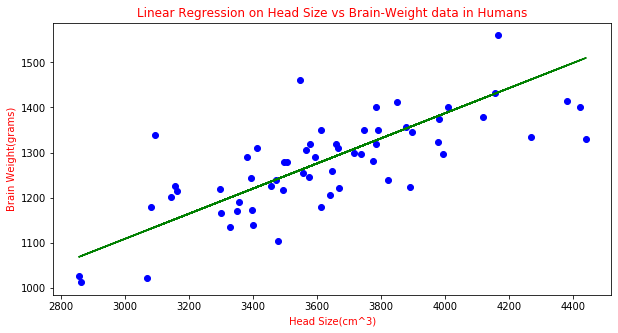

In [11]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Linear Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [14]:
y_pred = dtr.predict(x_test)
y_pred

array([1505. , 1225. , 1220. , 1230. , 1075. , 1170. , 1322. , 1405. ,
       1311. , 1260. , 1565. , 1380. , 1380. , 1496.5, 1150. , 1380. ,
       1245. , 1270. , 1335. , 1310. , 1468. , 1160. , 1095. , 1380. ,
       1070. , 1120. , 1270. , 1204. , 1260. , 1280. , 1408. , 1127. ,
       1505. , 1168. , 1355. , 1236. , 1370. , 1300. , 1250. , 1226. ,
       1358. , 1240. , 1070. , 1237. , 1280. , 1270. , 1320. , 1168. ,
       1350. , 1342.5, 1205. , 1355. , 1185. , 1170. , 1405. , 1362. ,
       1310. , 1270. , 1250. , 1270. ])

In [15]:
dtr.score(x_test,y_test)

0.29074285393164634

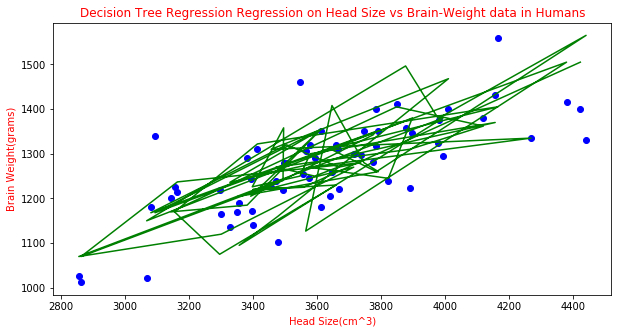

In [16]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Decision Tree Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [18]:
y_pred = rfr.predict(x_test)
y_pred

array([1520.405     , 1213.545     , 1220.26333333, 1245.39      ,
       1115.22      , 1161.11      , 1285.27666667, 1411.65      ,
       1318.06      , 1296.88416667, 1551.01333333, 1359.03      ,
       1357.18      , 1474.95      , 1131.77      , 1354.44      ,
       1243.41      , 1283.66      , 1384.42      , 1317.14      ,
       1413.97      , 1189.7       , 1133.05      , 1351.94      ,
       1068.69      , 1127.01033333, 1278.15      , 1192.85      ,
       1328.32      , 1319.75833333, 1349.82      , 1187.8125    ,
       1521.815     , 1134.03      , 1322.5       , 1233.416     ,
       1395.2       , 1293.65      , 1236.45      , 1221.38333333,
       1326.98      , 1276.02      , 1070.04      , 1207.39      ,
       1312.85      , 1266.04      , 1296.22      , 1137.91      ,
       1352.86416667, 1343.31583333, 1195.96      , 1321.45      ,
       1164.12333333, 1160.5       , 1396.36      , 1364.44      ,
       1330.512     , 1245.5       , 1255.3       , 1263.67   

In [19]:
rfr.score(x_test,y_test)

0.3867105901312158

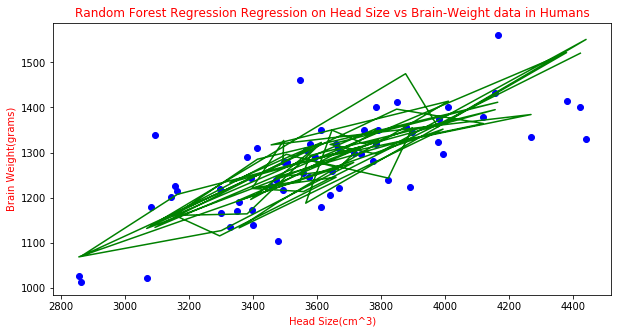

In [20]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Random Forest Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [21]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [22]:
y_pred = lasso.predict(x_test)
y_pred

array([1505.06708566, 1264.12402585, 1220.11361723, 1292.53580862,
       1191.14474068, 1151.86962919, 1224.01327369, 1433.20198805,
       1287.24341771, 1327.63271676, 1510.08092968, 1381.9493603 ,
       1381.11371963, 1352.98048374, 1127.63604977, 1358.82996843,
       1337.93895169, 1269.13786987, 1462.17086461, 1235.99078996,
       1390.305767  , 1241.84027465, 1208.13610097, 1385.57046987,
       1068.5841091 , 1192.53747513, 1307.85588757, 1206.46481963,
       1329.3039981 , 1316.76938805, 1288.91469905, 1266.07385408,
       1493.08956939, 1134.87826891, 1279.72265169, 1200.05824116,
       1430.97361293, 1269.97351054, 1261.06001006, 1219.55652345,
       1246.85411867, 1246.29702489, 1070.53393733, 1154.3765512 ,
       1313.98391915, 1294.76418374, 1249.36104068, 1131.25715934,
       1327.07562298, 1324.84724786, 1218.163789  , 1279.4441048 ,
       1215.09977321, 1148.8056134 , 1345.18117083, 1420.66737801,
       1356.60159331, 1240.16899331, 1273.873167  , 1294.20708

In [23]:
lasso.score(x_test,y_test)

0.49131240237345275

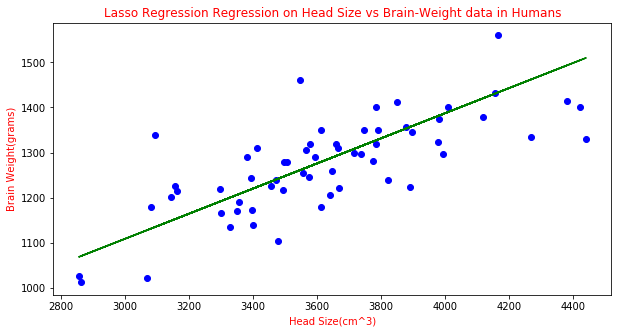

In [24]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Lasso Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [25]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [26]:
y_pred = ridge.predict(x_test)
y_pred

array([1505.06766958, 1264.12396807, 1220.11344224, 1292.53582651,
       1191.14448854, 1151.86927245, 1224.01310909, 1433.20238057,
       1287.24342151, 1327.63282812, 1510.08152695, 1381.94961632,
       1381.11397342, 1352.98066261, 1127.63562848, 1358.83016288,
       1337.9390905 , 1269.13782544, 1462.17133428, 1235.99065726,
       1390.30604527, 1241.84015752, 1208.13589408, 1385.57073553,
       1068.58353054, 1192.53722669, 1307.85594626, 1206.46460828,
       1329.30411391, 1316.76947048, 1288.9147073 , 1266.07380149,
       1493.09012141, 1134.87786691, 1279.72263545, 1200.05801275,
       1430.97399952, 1269.97346834, 1261.05994412, 1219.55634698,
       1246.8540149 , 1246.29691963, 1070.53336396, 1154.37620114,
       1313.98399416, 1294.76420757, 1249.36094358, 1131.2567477 ,
       1327.07573286, 1324.8473518 , 1218.16360882, 1279.44408782,
       1215.09958487, 1148.8052485 , 1345.18132892, 1420.66773714,
       1356.60178183, 1240.16887173, 1273.87313518, 1294.20711

In [27]:
ridge.score(x_test,y_test)

0.4913113291424248

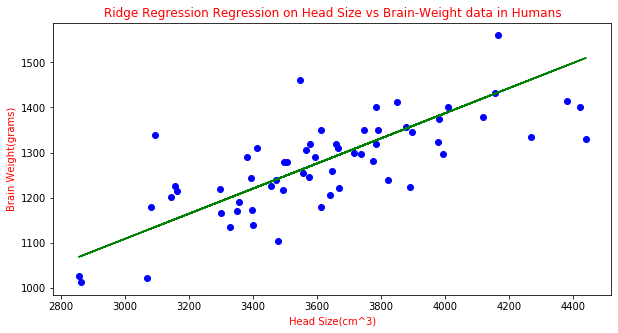

In [28]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Ridge Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [29]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[21:57:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [30]:
y_pred = xgb.predict(x_test)
y_pred

array([1510.9382, 1252.3983, 1228.0845, 1286.3854, 1159.7239, 1148.483 ,
       1265.7717, 1405.9349, 1305.6744, 1338.6738, 1543.022 , 1334.0033,
       1334.0033, 1423.0944, 1118.2343, 1350.1046, 1287.3083, 1278.6404,
       1412.9803, 1272.0089, 1430.5002, 1248.8826, 1163.3175, 1334.0033,
       1074.9777, 1159.7239, 1293.697 , 1192.1747, 1338.6738, 1338.6738,
       1318.4586, 1278.6404, 1510.9382, 1125.0615, 1277.484 , 1199.9406,
       1391.2756, 1278.6404, 1252.3983, 1228.0845, 1278.4933, 1278.4933,
       1074.9777, 1174.54  , 1338.6738, 1286.3854, 1278.4933, 1125.0615,
       1338.6738, 1338.6738, 1207.1694, 1277.484 , 1165.6819, 1148.483 ,
       1377.5059, 1391.2756, 1350.1046, 1266.1771, 1265.7139, 1286.3854],
      dtype=float32)

In [31]:
xgb.score(x_test,y_test)

0.45316537583825256

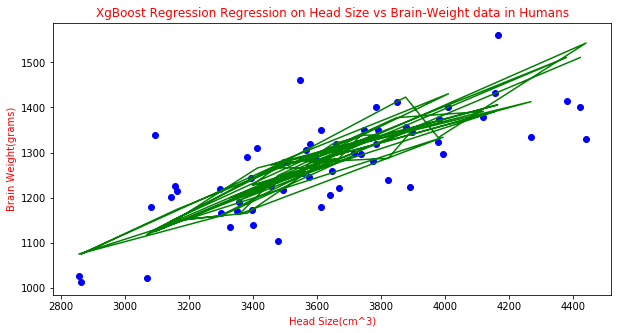

In [32]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("XgBoost Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [33]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(x_train, y_train)

MLPRegressor()

In [34]:
y_pred = mlp.predict(x_test)
y_pred

array([1563.9433578 , 1258.12209069, 1202.26109623, 1294.18425166,
       1165.49183406, 1115.64119977, 1207.2108046 , 1472.72730356,
       1287.46679031, 1338.73162699, 1570.30726856, 1407.67399356,
       1406.61334177, 1370.90473139, 1084.88229776, 1378.32929394,
       1351.81299911, 1264.48600145, 1509.49656573, 1222.41348031,
       1418.2805115 , 1229.83804286, 1187.05842053, 1412.27015133,
       1009.92957102, 1167.25958705, 1313.62953454, 1184.93711694,
       1340.85293058, 1324.94315367, 1289.58809389, 1260.59694487,
       1548.74068209, 1094.0746133 , 1277.92092417, 1176.80545319,
       1469.89889878, 1265.54665324, 1254.23303411, 1201.55399504,
       1236.20195362, 1235.49485243, 1012.40442521, 1118.82315515,
       1321.4076477 , 1297.01265645, 1239.383909  , 1089.47845553,
       1338.02452579, 1335.19612101, 1199.78624205, 1277.56737357,
       1195.89718547, 1111.75214319, 1361.00531465, 1456.81752666,
       1375.50088916, 1227.71673928, 1270.49636161, 1296.30555

In [35]:
mlp.score(x_test,y_test)

0.31728629966838184

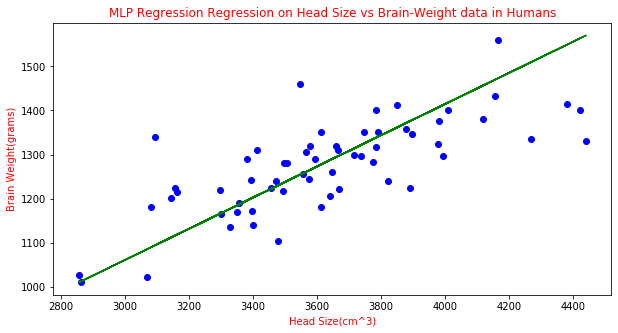

In [36]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("MLP Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Gradient Boosting Regressor 
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [38]:
y_pred = gb.predict(x_test)
y_pred

array([1513.01234416, 1248.3853918 , 1222.80061892, 1292.11338331,
       1136.67149795, 1145.5915883 , 1259.23251184, 1403.44929201,
       1303.59500884, 1333.93077717, 1544.70435731, 1335.6441373 ,
       1335.6441373 , 1456.60695741, 1117.8437317 , 1340.3047456 ,
       1257.50100949, 1278.19581869, 1374.42765118, 1301.13986694,
       1448.93463994, 1186.70439304, 1142.72721751, 1335.6441373 ,
       1074.11054693, 1141.17149795, 1287.1186808 , 1201.79732269,
       1333.93077717, 1333.93077717, 1322.64004997, 1191.56127495,
       1513.01234416, 1133.90614769, 1295.40225054, 1209.68635421,
       1387.25217888, 1278.19581869, 1248.3853918 , 1222.80061892,
       1315.40846566, 1252.28904965, 1074.11054693, 1178.96850714,
       1333.93077717, 1292.11338331, 1279.27661919, 1133.90614769,
       1333.93077717, 1333.93077717, 1205.80436892, 1295.40225054,
       1168.14533051, 1145.5915883 , 1384.13528068, 1387.25217888,
       1340.3047456 , 1279.27597239, 1264.19402862, 1292.11338

In [39]:
gb.score(x_test,y_test)

0.4429131618346204

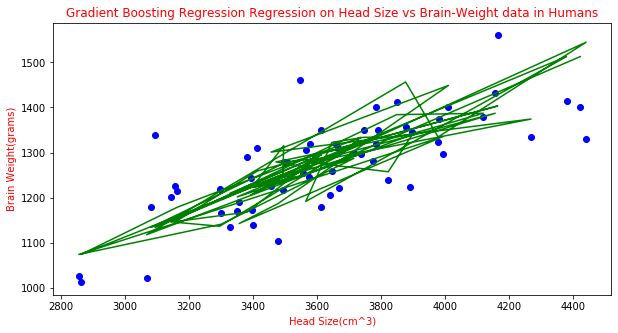

In [40]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("Gradient Boosting Regression Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

### Support Vector Machine Regressor 
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [41]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [42]:
y_pred = svm.predict(x_test)
y_pred

array([1293.35506731, 1269.36962284, 1251.45156324, 1282.14652942,
       1244.26788435, 1242.61252452, 1252.76549102, 1304.04968048,
       1279.835323  , 1295.42277506, 1292.54612391, 1305.60789185,
       1305.55369258, 1301.89023921, 1245.6482685 , 1302.95492669,
       1298.40962292, 1271.65535169, 1300.25600018, 1257.21810898,
       1305.98853181, 1259.58772839, 1247.90044448, 1305.80845046,
       1258.70550596, 1244.49965284, 1288.4530571 , 1247.4673058 ,
       1295.93914263, 1291.78115164, 1280.57094755, 1270.25739409,
       1295.31294106, 1244.48857382, 1276.47254913, 1245.95741226,
       1304.27941356, 1272.03688966, 1267.97964399, 1251.26985554,
       1261.70070884, 1261.46263425, 1258.26088639, 1242.45232456,
       1290.77203451, 1283.10226963, 1262.78125082, 1245.04511574,
       1295.24796877, 1294.53549101, 1250.82234109, 1276.34667691,
       1249.87257888, 1242.85179291, 1300.21829897, 1305.18715708,
       1302.568452  , 1258.89941556, 1273.81645619, 1282.86439

In [43]:
svm.score(x_test,y_test)

0.23160117399680202

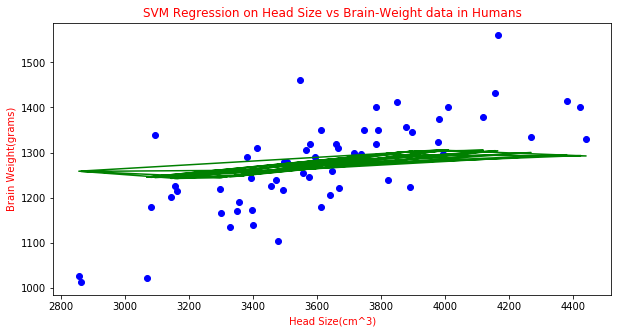

In [44]:
plt.figure(figsize = [10,5])
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.title("SVM Regression on Head Size vs Brain-Weight data in Humans",color='red')
plt.xlabel("Head Size(cm^3)",color='red')
plt.ylabel("Brain Weight(grams)",color='red')
plt.show()

***************************************************
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|0.49|
|Decision Tree Regressor|0.29|
|Random Forest Regressor|0.39|
|Lasso Regression|0.49|
|Ridge Regression|0.49|
|XgBoost Regressor|0.45|
|MLP Regressor|0.32|
|Gradient Boosting Regressor|0.44|
|Support Vector Regressor|0.23|

### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Linear Regression, Lasso Regression and Ridge Regression are having the upper hand in case of this dataset and after this, we can use XgBoost regressor which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. XgBoost Regression
5. Gradient Boosting Regression
6. Random Forest Regression
7. MLP Regressor
8. Decision Tree Regression
9. Support Vector Machine Regression

Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!